In [1]:
import requests
from credentials import api_key
url = 'https://www.alphavantage.co/query?function=OVERVIEW&symbol=IBM&apikey=demo'
r = requests.get(url)
data = r.json()

print(data)

{'Symbol': 'IBM', 'AssetType': 'Common Stock', 'Name': 'International Business Machines', 'Description': 'International Business Machines Corporation (IBM) is an American multinational technology company headquartered in Armonk, New York, with operations in over 170 countries. The company began in 1911, founded in Endicott, New York, as the Computing-Tabulating-Recording Company (CTR) and was renamed International Business Machines in 1924. IBM is incorporated in New York. IBM produces and sells computer hardware, middleware and software, and provides hosting and consulting services in areas ranging from mainframe computers to nanotechnology. IBM is also a major research organization, holding the record for most annual U.S. patents generated by a business (as of 2020) for 28 consecutive years. Inventions by IBM include the automated teller machine (ATM), the floppy disk, the hard disk drive, the magnetic stripe card, the relational database, the SQL programming language, the UPC barcod

In [2]:
for key, value in data.items():
    print(key)
    print(value)

Symbol
IBM
AssetType
Common Stock
Name
International Business Machines
Description
International Business Machines Corporation (IBM) is an American multinational technology company headquartered in Armonk, New York, with operations in over 170 countries. The company began in 1911, founded in Endicott, New York, as the Computing-Tabulating-Recording Company (CTR) and was renamed International Business Machines in 1924. IBM is incorporated in New York. IBM produces and sells computer hardware, middleware and software, and provides hosting and consulting services in areas ranging from mainframe computers to nanotechnology. IBM is also a major research organization, holding the record for most annual U.S. patents generated by a business (as of 2020) for 28 consecutive years. Inventions by IBM include the automated teller machine (ATM), the floppy disk, the hard disk drive, the magnetic stripe card, the relational database, the SQL programming language, the UPC barcode, and dynamic random-a

In [3]:
import pandas as pd

df = pd.DataFrame(data, index=[0])
print(df['EPS'])
print(df['BookValue'])

C:\Users\lucys\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


0    2.34
Name: EPS, dtype: object
0    24.37
Name: BookValue, dtype: object


In [4]:
# calculate the graham number
import math

eps = float(df['EPS'].iloc[0])
bvps = float(df['BookValue'].iloc[0])

graham_number = math.sqrt(22.5 * eps * bvps)
print(graham_number)

35.82011306514819


In [5]:
date = df['LatestQuarter']
date

0    2023-06-30
Name: LatestQuarter, dtype: object

In [8]:

# get the actual price from 2023-06-30

daily_url = f'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=IBM&interval=5min&{api_key}'
daily_r = requests.get(url)
daily_data = daily_r.json()

for key, value in daily_data.items():
    print(key)
    print(value)

Symbol
IBM
AssetType
Common Stock
Name
International Business Machines
Description
International Business Machines Corporation (IBM) is an American multinational technology company headquartered in Armonk, New York, with operations in over 170 countries. The company began in 1911, founded in Endicott, New York, as the Computing-Tabulating-Recording Company (CTR) and was renamed International Business Machines in 1924. IBM is incorporated in New York. IBM produces and sells computer hardware, middleware and software, and provides hosting and consulting services in areas ranging from mainframe computers to nanotechnology. IBM is also a major research organization, holding the record for most annual U.S. patents generated by a business (as of 2020) for 28 consecutive years. Inventions by IBM include the automated teller machine (ATM), the floppy disk, the hard disk drive, the magnetic stripe card, the relational database, the SQL programming language, the UPC barcode, and dynamic random-a

In [12]:
symbol = 'IBM'
interval = '30min'
intraday_url = f'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol={symbol}&interval={interval}&apikey={api_key}'
response = requests.get(intraday_url)
intraday_data = response.json()

latest_data = intraday_data['Time Series (30min)'][max(intraday_data['Time Series (30min)'].keys())]
latest_price = latest_data['1. open']

print(f'Der aktuelle Preis für {symbol} beträgt: {latest_price}')

Der aktuelle Preis für IBM beträgt: 143.2500


In [13]:
# target date 2020-01-01

target_date = '2020-01-01'
if target_date in intraday_data['Time Series (30min)']:
    data_for_date = intraday_data['Time Series (30min)'][target_date]
    opening_price = data_for_date['1. open']
    print(f'Der Eröffnungspreis für {symbol} am {target_date} betrug: {opening_price}')
else:
    print(f'Keine Daten verfügbar für {target_date}')

Keine Daten verfügbar für 2020-01-01


In [22]:
new_url = f'https://www.alphavantage.co/query?function=TIME_SERIES_MONTHLY_ADJUSTED&symbol=AAPL&apikey={api_key}&datatype=csv'
#new_r = requests.get(new_url)
#new_data = new_r.json()

df = pd.read_csv(new_url)
df = pd.DataFrame(df)
df

,timestamp,open,high,low,close,adjusted close,volume,dividend amount
0,2023-10-11,171.220,179.85,170.8200,179.80,179.8000,394213916,0.00
1,2023-09-29,189.485,189.98,167.6200,171.21,171.2100,1337873796,0.00
2,2023-08-31,196.235,196.73,171.9600,187.87,187.8700,1323817340,0.24
3,2023-07-31,193.780,198.23,186.6000,196.45,196.1852,996368613,0.00
4,2023-06-30,177.700,194.48,176.9306,193.97,193.7085,1297863403,0.00
...,...,...,...,...,...,...,...,...
282,2000-04-28,135.500,139.50,104.8700,124.06,0.9401,77342900,0.00
283,2000-03-31,118.560,150.38,114.0000,135.81,1.0291,77663900,0.00
284,2000-02-29,104.000,119.94,97.0000,114.62,0.8685,65355200,0.00
285,2000-01-31,104.870,121.50,86.5000,103.75,0.7862,112099800,0.00


In [29]:
target_date = '2017-12-29'

for index, row in df.iterrows():
    if row['timestamp'] == target_date:
            print(row['open'])


169.95


ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

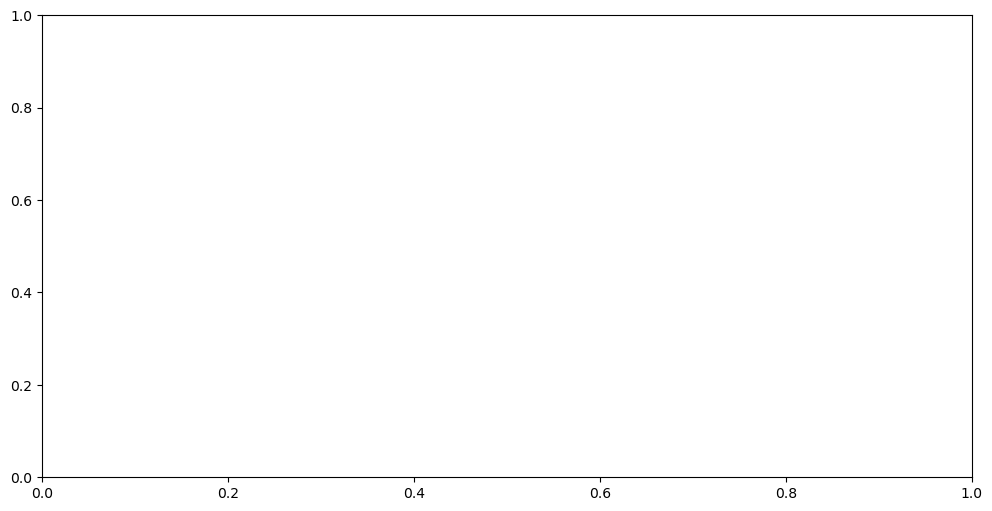

In [33]:
import matplotlib.pyplot as plt


#dates = df['timestamp']
#closing_prices = df['close'] # opening / closing ATTENTION

plt.figure(figsize=(12, 6))
plt.plot(pd.to_datetime(df['timestamp']), df['close'], label='Apple Aktienkurs', color='b')
plt.title('Apple Aktienkursverlauf')
plt.xlabel('Datum')
plt.ylabel('Schlusskurs')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()
